# Exercise 6: Support Vector Machines

In this exercise, you will be using support vector machines (SVMs) to build
a spam classifier.

In [396]:
# libraries
# data handling
import pandas as pd
import numpy as np
import scipy.io as sio
from nltk.stem import PorterStemmer

# SVM modeling
from sklearn import svm

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Support Vector Machines

In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datasets. Experimenting with these datasets
will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

### Example dataset 1

We will begin by with a 2D example dataset which can be separated by a
linear boundary. The script ex6.m will plot the training data (Figure 1). In
this dataset, the positions of the positive examples (indicated with +) and the
negative examples (indicated with o) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example + on
the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary

(51, 2) (51,)


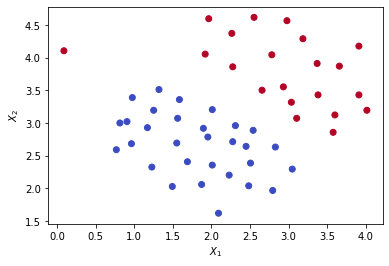

In [200]:
# import data
dat = sio.loadmat("ex6/ex6data1.mat")
dat

# make variables
X1 = dat["X"]
y1 = np.array(dat["y"].flatten(),dtype='float')

# check
print(X1.shape, y1.shape)

# visualize
plt.scatter(x=X1[:, 0].flatten(), y=X1[:, 1].flatten(), c=y1, cmap=plt.cm.coolwarm)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

In this part of the exercise, you will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role
similar to $\frac{1}{\lambda}$
, where λ is the regularization parameter that we were using
previously for logistic regression.

Most SVM software packages (including
svmTrain.m) automatically add the extra feature x0 = 1 for you and automatically take care of learning the intercept term $\theta_0$

Your task is to try different values of C on this dataset. Specifically, you
should change the value of C in the script to C = 100 and run the SVM
training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data 


In [298]:
def compute_svm(x, y, C_, kernel_, gamma_='auto',plot=False):
    """
    Returns SVM fitted model and plots if set to True.
    """
    # use sklearn SVM functions
    # create classifier
    clf = svm.SVC(gamma=gamma_, C=C_, kernel=kernel_, degree=20)
    # fit classifier to data
    clf.fit(x, y)

    # visualize boundary
    if plot:
        plot_boundaries(x,y,clf)

    return clf

def plot_boundaries(x,y,clf):
    # set axis limits to data
    x_1, y_1 = x.min(axis=0)
    x_2, y_2 = x.max(axis=0)
    # prepare axis
    x_coord = np.linspace(x_1, x_2, 100)
    y_coord = np.linspace(y_1, y_2, 100)
    coords = np.c_[x_coord, y_coord]
    # compute predictions
    # compute prices for all grid given the optimized parameters
    z = np.zeros((x_coord.shape[0], y_coord.shape[0]))
    for i in range(len(x_coord)):
        for j in range(len(y_coord)):
            xx_grid = np.array([[x_coord[i], y_coord[j]]])
            tmp = clf.predict(xx_grid)
            # print(xx_grid,tmp)
            z[j,i] = tmp

    # plot
    # data
    plt.scatter(x=x[:, 0].flatten(), y=x[:, 1].flatten(), c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(r"$X_1$")
    plt.ylabel(r"$X_2$")
    # decision boundary
    plt.contourf(x_coord, y_coord, z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.show()

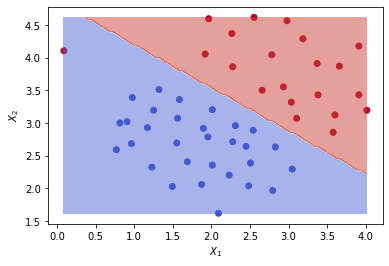

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [299]:
compute_svm(x=X1,y=y1,C_=1,kernel_='linear',plot=True)

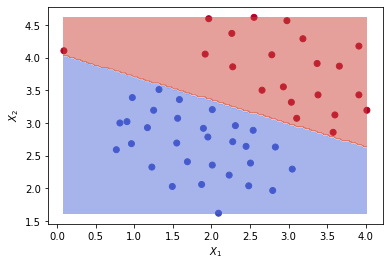

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [284]:
compute_svm(X1,y1,1000,'linear',plot=True)

### SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

#### Gaussian Kernel

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
$(x^{(i)},x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, σ, which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.



In [285]:
def gaussianKernel(x_i, x_j, sigma):
    """
    Returns gaussian kernel given two data points and parameter sigma.
    """
    return np.exp(-(np.sum((x_i - x_j) ** 2) / (2 * (sigma ** 2))))

# example
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
gaussianKernel(x1,x2,sigma)

0.32465246735834974

### Example dataset 2


From
the figure, you can obserse that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

(863, 2) (863,)


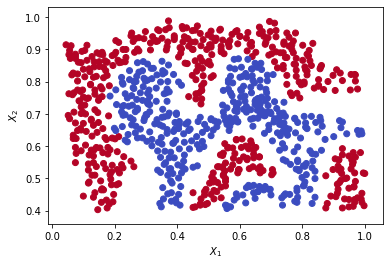

In [286]:
# import data
dat = sio.loadmat("ex6/ex6data2.mat")
dat

# make variables
X2 = dat["X"]
y2 = np.array(dat["y"].flatten(),dtype='float')

# check
print(X2.shape, y2.shape)

# visualize
plt.scatter(x=X2[:, 0].flatten(), y=X2[:, 1].flatten(), c=y2, cmap=plt.cm.coolwarm)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

Note that in sklearn.svm.SVC the parameter sigma is substituted by another hyperparameter that oppositely, the highest the less spread ([see example](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/)).

As illustrated below, we achieve the same result with gamma = 100, which corresponds to the inverse of $\sigma^2$ as in the gaussian function

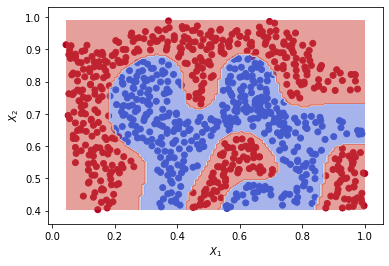

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [300]:
compute_svm(X2,y2,1,'rbf',gamma_=100,plot=True) # rbf means gaussian (Radial Basis Function)

### Example dataset 3

training set (X, y) using parameters loaded from dataset3Params.m.
Your task is to use the cross validation set Xval, yval to determine the
best C and σ parameter to use. You should write any additional code necessary to help you search over the parameters C and σ
σ. For both C and σ, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and σ (e.g., C = 0.3
and σ = 0.1). For example, if you try each of the 8 values listed above for C
and for σ
2
, you would end up training and evaluating (on the cross validation
set) a total of 82 = 64 different models.

(211, 2) (211,)


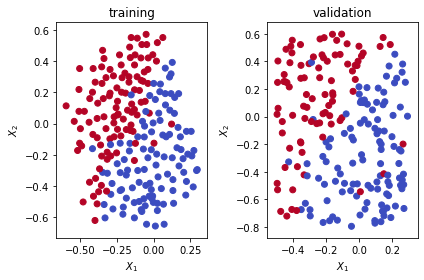

In [307]:
# import data
dat = sio.loadmat("ex6/ex6data3.mat")
dat

# make variables
X3 = dat["X"]
y3 = np.array(dat["y"].flatten(),dtype='float')

X3val = dat["Xval"]
y3val = np.array(dat["yval"].flatten(),dtype='float')


# check
print(X3.shape, y3.shape)

# visualize
plt.subplot(1, 2, 1)
plt.scatter(x=X3[:, 0].flatten(), y=X3[:, 1].flatten(), c=y3, cmap=plt.cm.coolwarm)
plt.title('training')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.subplot(1,2,2)
plt.scatter(x=X3val[:, 0].flatten(), y=X3val[:, 1].flatten(), c=y3val, cmap=plt.cm.coolwarm)
plt.title('validation')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.tight_layout()
plt.show()

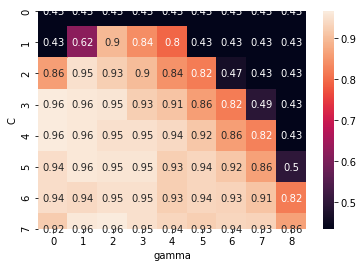

In [344]:
# c and gamma values to evaluate
# values proposed from exercise
c_vals = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
g_vals = 1 / np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300])
# init accuracy matrix
acc = np.zeros((len(c_vals), len(g_vals)))
for i,tmp_c in enumerate(c_vals):
    for j,tmp_g in enumerate(g_vals):
        # train SVM classifier
        tmp_clf = compute_svm(X3, y3, tmp_c, "rbf", gamma_=tmp_g)

        # predict with cross validation
        tmp_pred = tmp_clf.predict(X3val)

        # compute accuracy
        acc[i, j] = np.sum(tmp_pred == y3val) / len(y3val)
        
# visualize accuracy
sns.heatmap(acc,annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()

index best accuracy: (3, 0) best accuracy: 0.965
check: 0.965


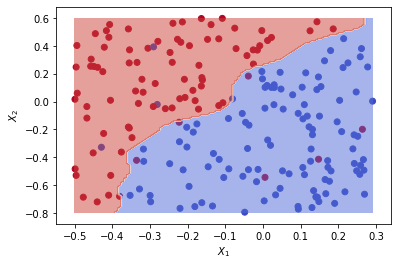

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [351]:
# see index of best values
idx = np.unravel_index(np.argmax(acc, axis=None), acc.shape)
print('index best accuracy:',idx, 'best accuracy:',acc[idx])

# save best parameters
c_best = c_vals[idx[0]] 
g_best = g_vals[idx[1]]

# check
# train SVM classifier
tmp_clf = compute_svm(X3, y3, c_best, "rbf", gamma_=g_best)

# predict with cross validation
tmp_pred = tmp_clf.predict(X3val)

# compute accuracy
print('check:',np.sum(tmp_pred == y3val) / len(y3val))

# visualize
compute_svm(X3val,y3val,c_best,'rbf',gamma_=g_best,plot=True) 

## Spam Classification

Many email services today provide spam filters that are able to classify emails
into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.
You will be training a classifier to classify whether a given email, x, is
spam (y = 1) or non-spam (y = 0). In particular, you need to convert each
email into a feature vector x ∈ R
n
. The following parts of the exercise will
walk you through how such a feature vector can be constructed from an
email.
Throughout the rest of this exercise, you will be using the the script
ex6 spam.m. The dataset included for this exercise is based on a a subset of
the SpamAssassin Public Corpus.3 For the purpose of this exercise, you will
only be using the body of the email (excluding the email headers).

### Preprocessing emails

one method often employed in processing emails is to
“normalize” these values, so that all URLs are treated the same, all numbers
are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.
This has the effect of letting the spam classifier make a classification decision
based on whether any URL was present, rather than whether a specific URL
was present. This typically improves the performance of a spam classifier,
since spammers often randomize the URLs, and thus the odds of seeing any
particular URL again in a new piece of spam is very small.

processEmail.m, we have implemented the following email preprocessing and normalization steps:
- Lower-casing: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
- Stripping HTML: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
- Normalizing URLs: All URLs are replaced with the text “httpaddr”.
- Normalizing Email Addresses: All email addresses are replaced
with the text “emailaddr”.
- Normalizing Numbers: All numbers are replaced with the text
“number”.
- Normalizing Dollars: All dollar signs ($) are replaced with the text “dollar”.
- Word Stemming: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”. 
- Removal of non-words: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

#### Vocabulary List

After preprocessing the emails, we have a list of words (e.g., Figure 9) for
each email. The next step is to choose which words we would like to use in
our classifier and which we would want to leave out.

For this exercise, we have chosen only the most frequently occuring words
as our set of words considered (the vocabulary list). Since words that occur
rarely in the training set are only in a few emails, they might cause the
model to overfit our training set. The complete vocabulary list is in the file
`vocab.txt` and also shown in Figure 10. Our vocabulary list was selected
by choosing all words which occur at least a 100 times in the spam corpus,
resulting in a list of 1899 words. In practice, a vocabulary list with about
10,000 to 50,000 words is often used.

Given the vocabulary list, we can now map each word in the preprocessed
emails (e.g., Figure 9) into a list of word indices that contains the index
of the word in the vocabulary list. Figure 11 shows the mapping for the
sample email. Specifically, in the sample email, the word “anyone” was first
normalized to “anyon” and then mapped onto the index 86 in the vocabulary
list.

Once you have implemented `processEmail`, the script
run your code on the email sample and you should see an output similar to
Figures 9 & 11.

In [477]:
with open('ex6/emailSample1.txt','r') as email_sample: email = email_sample.readlines()
email

['> Anyone knows how much it costs to host a web portal ?\n',
 '>\n',
 "Well, it depends on how many visitors you're expecting.\n",
 'This can be anywhere from less than 10 bucks a month to a couple of $100. \n',
 'You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \n',
 'if youre running something big..\n',
 '\n',
 'To unsubscribe yourself from this mailing list, send an email to:\n',
 'groupname-unsubscribe@egroups.com\n',
 '\n']

In [478]:
vocab = pd.read_csv('ex6/vocab.txt',sep='\t',header=None, index_col=1)
vocab = vocab.to_dict()[0]

In [522]:
def processEmail(email,vocab):
    # preprocessing
    # as vector by spaces
    tmp_email = pd.Series(' '.join(email).split(' '))

    # lowercasing
    tmp_email = tmp_email.str.lower()

    # stripping html tags
    tmp_email = tmp_email.str.replace('<[^<>]+>',' ',regex=True)

    # normalizing urls
    tmp_email = tmp_email.str.replace('(http|https)://[^\s]*','httpaddr',regex=True)

    # normalizing email addresses
    tmp_email = tmp_email.str.replace('[^\s]+@[^\s]+','emailaddr',regex=True)

    # normalizing numbers
    tmp_email = tmp_email.str.replace('[0-9]+','number',regex=True)

    # normalizing dollars
    tmp_email = tmp_email.str.replace('[$]+','dollar',regex=True)

    # word stemming (take out endings like 's','ed','ing','es','e')
    porter = PorterStemmer()
    for i,word in enumerate(tmp_email): tmp_email[i] = porter.stem(word)

    # removal of non words
    tmp_email = tmp_email.str.replace('[^a-zA-Z0-9]','',regex=True)

    # delete empty strings
    tmp_email = tmp_email[tmp_email!='']


    # apply vocabulary list
    tmp_email = [vocab.get(word) for word in list(tmp_email)]

    # delete not mapped
    tmp_email = [word_code for word_code in tmp_email if word_code!=None]
    
    return np.array(tmp_email)

# example
processEmail(email,vocab)

### Extracting features from emails

You will now implement the feature extraction that converts each email into
a vector in R
n
. For this exercise, you will be using n = # words in vocabulary
list. Specifically, the feature xi ∈ {0, 1} for an email corresponds to whether
the i-th word in the dictionary occurs in the email. That is, xi = 1 if the i-th
word is in the email and xi = 0 if the i-th word is not present in the email.

You should now complete the code in `emailFeatures` to generate a
feature vector for an email, given the word indices.
Once you have implemented `emailFeatures`, the next part of will run your code on the email sample. You should see that the feature vector had length 1899 and 45 non-zero entries.

In [545]:
def emailFeatures(email, vocab):
    """
    Returns feature vector from input email given a vocab. Pre-processing is performed automatically.
    """
    # preprocess email given vocabulary
    tmp_processed = processEmail(email, vocab)

    # make array of available feature number
    vocab_vals = np.array(list(vocab.values()))

    # init
    v_features = np.zeros((len(vocab_vals), 1))

    # put 1s where words were found
    idx = np.isin(vocab_vals, tmp_processed)
    v_features[list(idx)] = 1

    return v_features


# example
emailFeatures(email, vocab)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Training SVM for Spam Classification

Load preprocessed training dataset to train the SVM classifier. `spamTrain.mat` contains 4000 training examples of spam
and non-spam email, while `spamTest.mat` contains 1000 test examples. Each original email was processed using the `processEmail` and `emailFeatures` functions and converted into a vector of length 1899.

After loading the dataset, proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [580]:
# load data
# training
dat_train = sio.loadmat("ex6/spamTrain.mat")
X = np.array(dat_train["X"], dtype="float")
y = np.array(dat_train["y"].flatten(), dtype="float")

# testing
dat_test = sio.loadmat("ex6/spamTest.mat")
Xtest = np.array(dat_test["Xtest"], dtype="float")
ytest = np.array(dat_test["ytest"].flatten(), dtype="float")

In [586]:
def spam_filter(X, y, C_, kernel_, Xtest, ytest):
    # train SVM
    tmp_clf = compute_svm(x, y, C_, kernel_)

    # make predictions
    tmp_pred = tmp_clf.predict(X)
    # compute accuracy
    acc_train = np.sum(tmp_pred.flatten() == y) / len(y)

    # make predictions
    tmp_pred = tmp_clf.predict(Xtest)
    # compute accuracy
    acc_test = np.sum(tmp_pred.flatten() == ytest) / len(ytest)

    print("Accuracy Training:", acc_train, "Accuracy Testing:", acc_test)
    
    return tmp_clf

# check
spam_clf = spam_filter(X, y, 0.1, "linear", Xtest, ytest)

Accuracy Training: 0.99825 Accuracy Testing: 0.989


### Top predictors for Spam

To better understand how the spam classifier works, we can inspect the
parameters to see which words the classifier thinks are the most predictive
of spam. The next step of ex6 spam.m finds the parameters with the largest
positive values in the classifier and displays the corresponding words (Figure
12). Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and “price” (the top predictors shown in Figure 12), it is likely to be
classified as spam.

In [644]:
# top ten coefficients
print('Spam:',np.sort(spam_clf.coef_)[0][-10:])
print('No spam:',np.sort(spam_clf.coef_)[0][:10])

Spam: [0.26116889 0.26729771 0.26972411 0.32363204 0.3450641  0.3677104
 0.3836216  0.42286912 0.46591639 0.50061374]
No spam: [-0.60513164 -0.43807244 -0.42835516 -0.40992251 -0.40549216 -0.36184664
 -0.35248372 -0.32791815 -0.32252768 -0.31543261]


In [647]:
# indices of the top 10 coefficients that identify spam messages
idx_top10 = spam_clf.coef_[0].argsort()[-10:]
idx_last10 = spam_clf.coef_[0].argsort()[:10]

# check in vocabulary
words_spam = np.array(list(vocab.keys()))[list(idx_top10)]
words_nospam = np.array(list(vocab.keys()))[list(idx_last10)]

pd.DataFrame(zip(words_spam,words_nospam))

,0,1
0,pleas,spamassassin
1,price,the
2,will,url
3,dollar,wrote
4,basenumb,date
5,visit,list
6,guarante,rpm
7,remov,numbertnumb
8,click,user
9,our,until
